In [3]:
# Installing the required libraries 
!pip install prophet

In [37]:
# Importing required libraries and dependencies 
import pandas as pd
import datetime as dt 
import numpy as np
from prophet import Prophet 
import matplotlib.pyplot as plt


In [5]:
# File Path For CSV
file_path = "Economy_Data.csv"

In [17]:
# Reading the Ecomonic Data file into a Pandas DataFrame 
economic_data = pd.read_csv(file_path, delimiter=";").dropna()

# Displaying the first five rows of the Data Frame
economic_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10


In [18]:
# Filtering the data to only show the years 2009-2019 (We wanted to focus on the past 10 years and this was the most recent 10 year period)
filtered_economic_data = economic_data[(economic_data["Year"] >= 2009) & (economic_data["Year"] <=2019)]

# Displaying the first five rows of the filtered Data Frame  
filtered_economic_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67470,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
67471,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
67472,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
67473,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
67474,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


In [22]:
# Filtering The Data for Adjusted Net National Income
net_national_income_all = filtered_economic_data[filtered_economic_data["SeriesName"].str.contains("Adjusted net national income", case=False)]

# Viewing the first five rows of the net_national_income_all Data Frame 
net_national_income_all.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67470,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
67471,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
67472,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
67473,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
67474,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


In [30]:
# Grouping by "CountryName" and "Year" then calculating the mean for annual % growth 
group_net_national_income = net_national_income_all.groupby(["CountryName", "Year"])["Value"].mean().reset_index()

# Displaying the first five rows of the filtered Data Frame 
group_net_national_income.head()

,CountryName,Year,Value
0,Brazil,2009.0,5.249900e+11
1,Brazil,2010.0,6.095448e+11
2,Brazil,2011.0,6.824218e+11
3,Brazil,2012.0,6.709171e+11
4,Brazil,2013.0,6.915997e+11


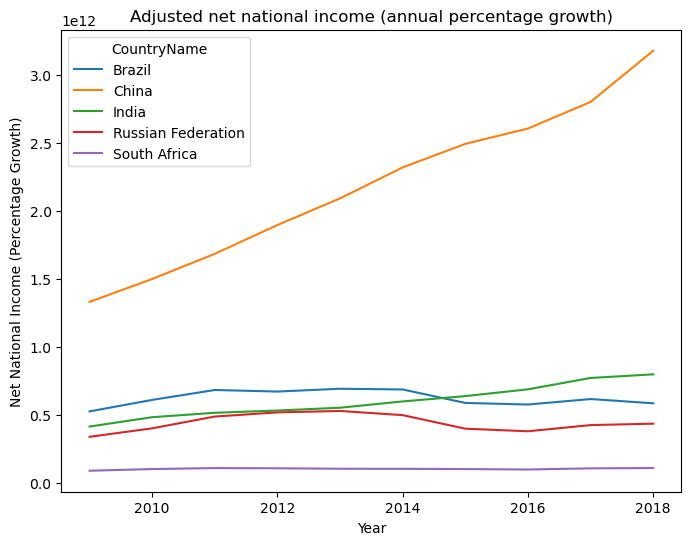

In [38]:
# Creating a line plot to show the Adjusted net national income
group_net_national_income.pivot(index="Year", columns="CountryName", values="Value").plot(kind="line", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted net national income (annual percentage growth)")
plt.xlabel("Year")
plt.ylabel("Net National Income (Percentage Growth)")
plt.show()

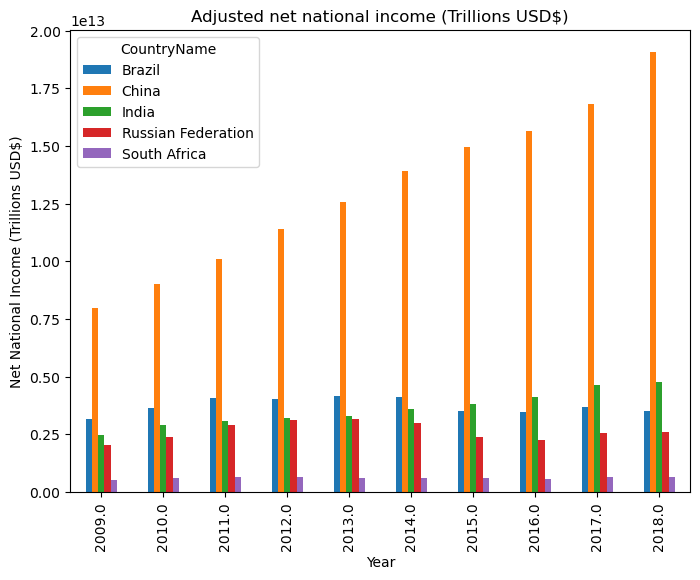

In [41]:
# Grouping by "CountryName" and "Year" then calculating the sum for annual % growth 
grouped_net_income_dollar_amount = net_national_income_all.groupby(["CountryName", "Year",])["Value"].sum().reset_index()

# Creating a line plot to show the Adjusted net national income in dollar amount 
grouped_net_income_dollar_amount.pivot(index="Year", columns="CountryName", values="Value").plot(kind="bar", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted net national income (Trillions USD$)")
plt.xlabel("Year")
plt.ylabel("Net National Income (Trillions USD$)")
plt.show()